In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 


In [2]:
#step 1 load the dataset 
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

In [3]:
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction', 'Age','Outcome']
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [4]:
df = pd.read_csv(url, names= cols)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
#step 2 feature and target
X = df.drop("Outcome",axis=1)
y=df["Outcome"]

In [6]:
# step3 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#step4 train decision tree
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [8]:
#step5 train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100,random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
#step6 compare Accuracy
print("Decision Tree - Training:", dt_clf.score(X_train,y_train))
print("Decision Tree - Testing Accuracy:", dt_clf.score(X_train,y_train))

print("Random forest - Training Accuracy:", rf_clf.score(X_train,y_train))
print("Random forest - Training Accuracy:", rf_clf.score(X_train,y_train))

Decision Tree - Training: 0.7752442996742671
Decision Tree - Testing Accuracy: 0.7752442996742671
Random forest - Training Accuracy: 1.0
Random forest - Training Accuracy: 1.0


In [10]:
#step 7 feature Importance from random forest 
importances = rf_clf.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

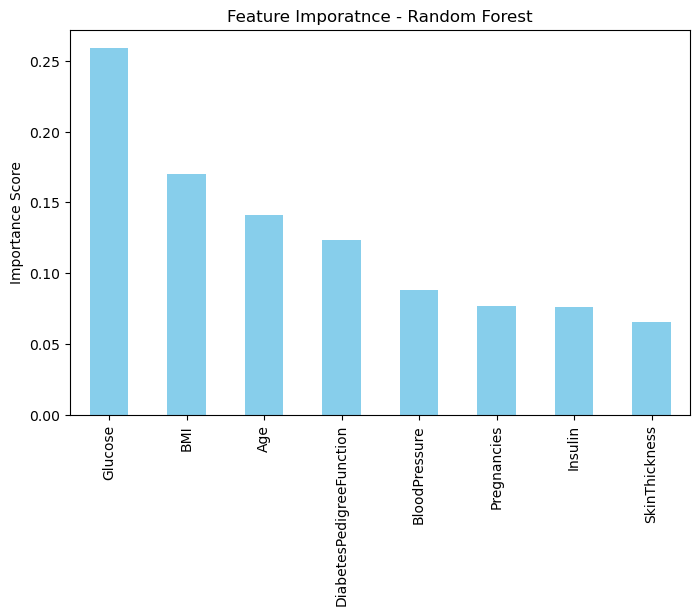

In [11]:
#step 8 plot feature importance 
plt.figure(figsize=(8,5))
feat_importance.plot(kind='bar', color ="skyblue")
plt.title("Feature Imporatnce - Random Forest")
plt.ylabel("Importance Score")
plt.show()